# Component Failure Analysis in Engineering and  Manufacturing 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings ("ignore")

# Loading the dataset

In [2]:
data=pd.read_csv(r"C:\Users\Vivek H M\Downloads\ML Project by Mithilesh-20230220T083915Z-001\ML Project by Mithilesh\Feb_13_Component_Failure_Prediction\component_failure_prediction.csv")
df=data.copy()
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [3]:
 df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [5]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [6]:
df.rename(columns={ 'Air temperature [K]':'Air temperature',
       'Process temperature [K]':'Process temperature', 'Rotational speed [rpm]':'Rotational speed', 'Torque [Nm]':'Torque',
       'Tool wear [min]':'Tool wear'},inplace=True)



In [7]:
df.head()

,UDI,Product ID,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


<AxesSubplot:ylabel='Torque'>

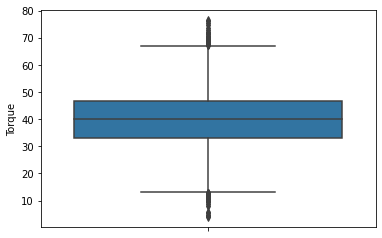

In [8]:
sns.boxplot(y='Torque',data=df)

AxesSubplot(0.125,0.125;0.775x0.755)


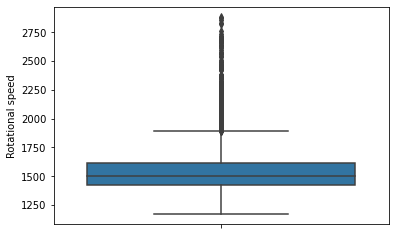

In [9]:
print(sns.boxplot(y='Rotational speed',data=df))


<AxesSubplot:ylabel='Tool wear'>

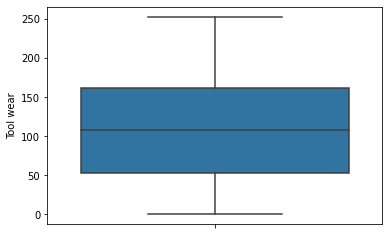

In [10]:
sns.boxplot(y='Tool wear',data=df)

In [11]:
df.head()

,UDI,Product ID,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [12]:
df.corr()

,UDI,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Target
UDI,1.000000,0.117428,0.324428,-0.006615,0.003207,-0.010702,-0.022892
Air temperature,0.117428,1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556
Process temperature,0.324428,0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946
Rotational speed,-0.006615,0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188
Torque,0.003207,-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321
Tool wear,-0.010702,0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448
Target,-0.022892,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000


<AxesSubplot:>

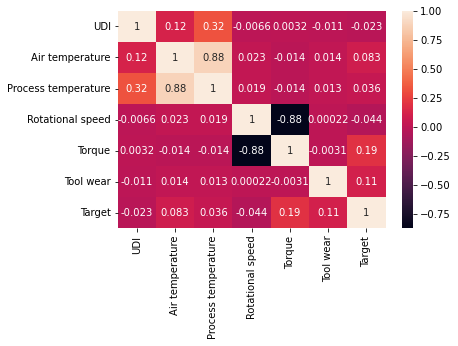

In [13]:
sns.heatmap(df.corr(),annot=True)

In [14]:
df.drop(['UDI','Product ID'],axis=1,inplace=True)

In [15]:
df.head()

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [16]:
df['Target'].value_counts()

0    9661
1     339
Name: Target, dtype: int64

In [17]:
df['Failure Type'].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

In [18]:
df.Type.value_counts()

L    6000
M    2997
H    1003
Name: Type, dtype: int64

In [19]:
df.isnull().sum()

Type                   0
Air temperature        0
Process temperature    0
Rotational speed       0
Torque                 0
Tool wear              0
Target                 0
Failure Type           0
dtype: int64

# Finding the diffrences in no. of failure

In [20]:
df_failure=df[df['Target']==1]

df_failure['Failure Type'].value_counts()


Heat Dissipation Failure    112
Power Failure                95
Overstrain Failure           78
Tool Wear Failure            45
No Failure                    9
Name: Failure Type, dtype: int64

In [21]:
df_failure[df_failure['Failure Type']=="No Failure"]

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Target,Failure Type
1437,H,298.8,309.9,1439,45.2,40,1,No Failure
2749,M,299.7,309.2,1685,28.9,179,1,No Failure
4044,M,301.9,310.9,1419,47.7,20,1,No Failure
4684,M,303.6,311.8,1421,44.8,101,1,No Failure
5536,M,302.3,311.8,1363,54.0,119,1,No Failure
5941,L,300.6,310.7,1438,48.5,78,1,No Failure
6478,L,300.5,309.8,1663,29.1,145,1,No Failure
8506,L,298.4,309.6,1710,27.3,163,1,No Failure
9015,L,297.2,308.1,1431,49.7,210,1,No Failure


In [22]:
index_possible_failure=df_failure[df_failure['Failure Type']=="No Failure"].index
df.drop(index_possible_failure,axis=0,inplace=True)

In [23]:
df["Target"].value_counts()

0    9661
1     330
Name: Target, dtype: int64

In [24]:
df_failure=df[df["Target"]==0]
df_failure["Failure Type"].value_counts()

No Failure         9643
Random Failures      18
Name: Failure Type, dtype: int64

In [25]:
df_failure[df_failure['Failure Type']=='Random Failures']

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Target,Failure Type
1221,M,297.0,308.3,1399,46.4,132,0,Random Failures
1302,L,298.6,309.8,1505,45.7,144,0,Random Failures
1748,H,298.4,307.7,1626,31.1,166,0,Random Failures
2072,L,299.6,309.5,1570,35.5,189,0,Random Failures
2559,L,299.3,309.0,1447,50.4,140,0,Random Failures
3065,M,300.1,309.2,1687,27.7,95,0,Random Failures
3452,H,301.6,310.5,1602,32.3,2,0,Random Failures
5471,L,302.7,312.3,1346,61.2,170,0,Random Failures
5489,L,302.6,312.1,1499,35.0,215,0,Random Failures
5495,H,302.9,312.5,1357,55.0,12,0,Random Failures


In [26]:
index_possible_failure=df_failure[df_failure['Failure Type']=='Random Failures'].index
df.drop(index_possible_failure,axis=0,inplace=True)

In [27]:
df["Target"].value_counts()

0    9643
1     330
Name: Target, dtype: int64

In [28]:
df.shape

(9973, 8)

# EDA


In [29]:
#pairplot

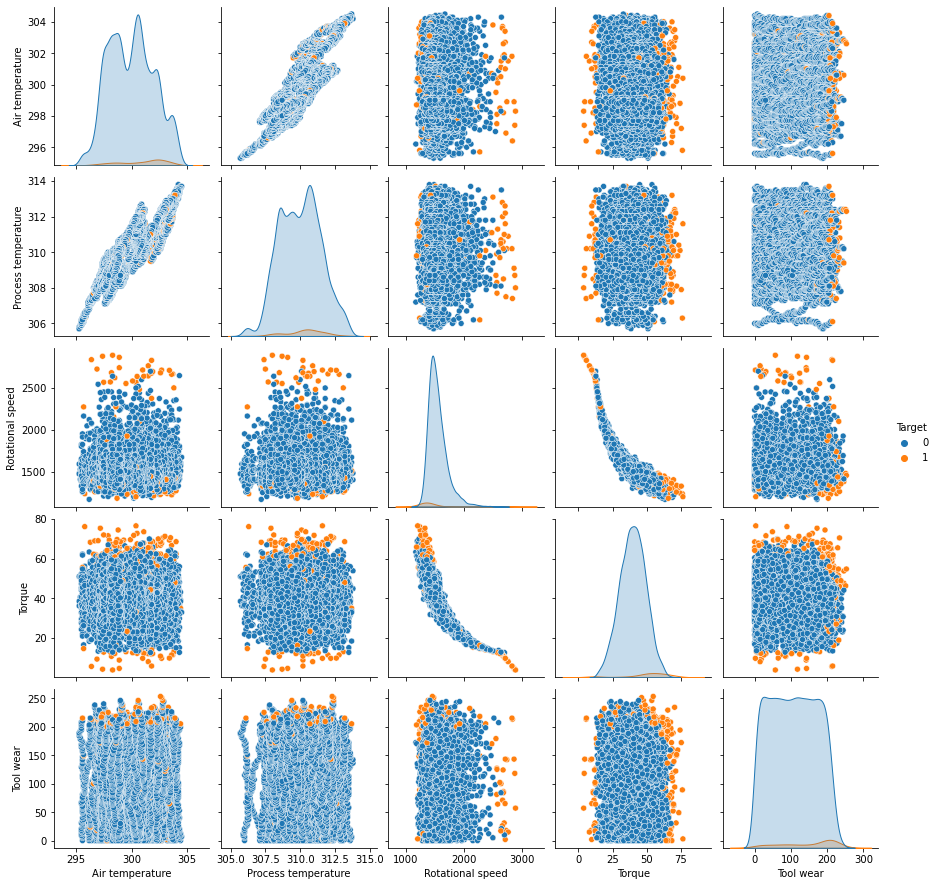

In [30]:
sns.pairplot(df,hue="Target")

In [31]:
# Torque & Rotational speed are inversely propotional and highly corelated. Linear but negative.
# Air temperature and process temp are positively correalted.
# we can identify that the failures are more at extreme high or extreme low value of Torque & Rotational speed

<AxesSubplot:xlabel='Target', ylabel='Rotational speed'>

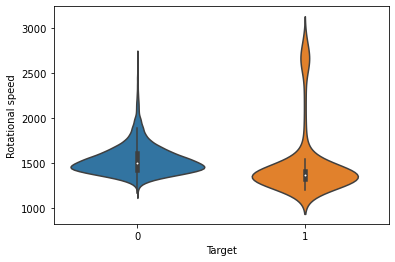

In [32]:
sns.violinplot(x=df['Target'],y=df['Rotational speed'])

<AxesSubplot:xlabel='Target', ylabel='Torque'>

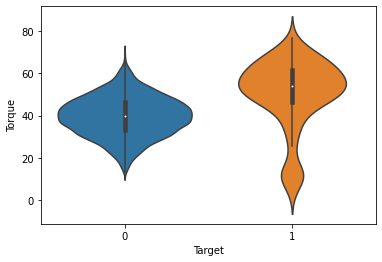

In [33]:
sns.violinplot(x='Target',y='Torque',data=df)

<AxesSubplot:xlabel='Torque', ylabel='Count'>

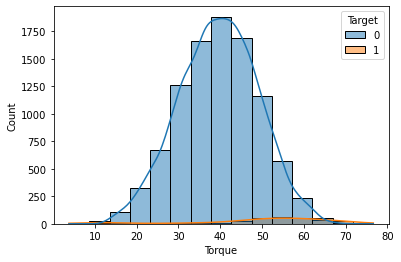

In [34]:
sns.histplot(x='Torque',hue='Target',data=df,kde=True,bins=15)

<AxesSubplot:xlabel='Rotational speed', ylabel='Count'>

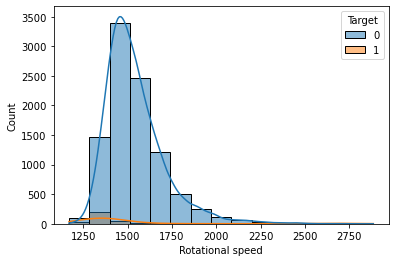

In [35]:
sns.histplot(x='Rotational speed',hue='Target',data=df,kde=True,bins=15)

<AxesSubplot:xlabel='Rotational speed', ylabel='Torque'>

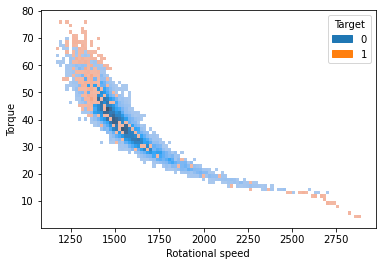

In [36]:
sns.histplot(x='Rotational speed',y='Torque',hue='Target',data=df)

<AxesSubplot:xlabel='Rotational speed', ylabel='Torque'>

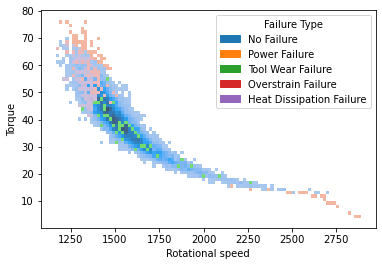

In [37]:
sns.histplot(x='Rotational speed',y='Torque',hue='Failure Type',data=df)

In [38]:
#from the above histplot we can observe that Torque is exhibiting normal distribution and rotational speed is right skewed 

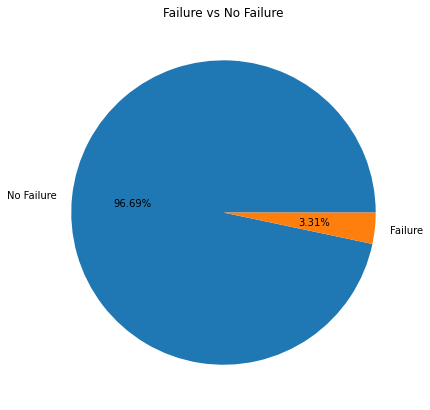

In [39]:
plt.figure(figsize=(7,7))
plt.pie(x=df['Target'].value_counts(normalize=True),labels=['No Failure','Failure'],autopct='%1.2f%%',)
plt.title('Failure vs No Failure')
plt.show()

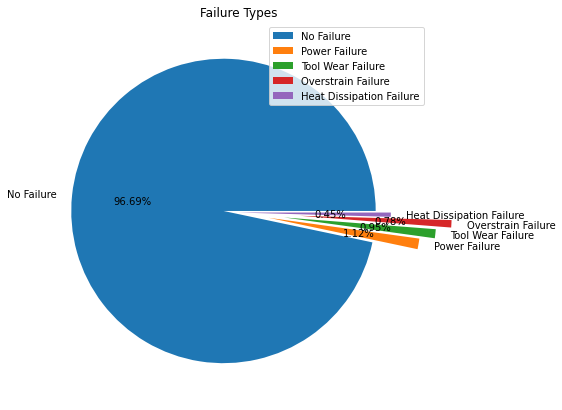

In [40]:
plt.figure(figsize=(7,7))
failure_type=df['Failure Type'].unique().tolist()
plt.pie(x=df['Failure Type'].value_counts(),labels=['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Heat Dissipation Failure'],explode=[0.1,0.2,0.3,0.4,0.0],autopct="%1.2f%%")
plt.legend(failure_type)
plt.title('Failure Types')
plt.show()

In [41]:
df['Type'].value_counts(normalize=True)*100

L    60.002005
M    29.990976
H    10.007019
Name: Type, dtype: float64

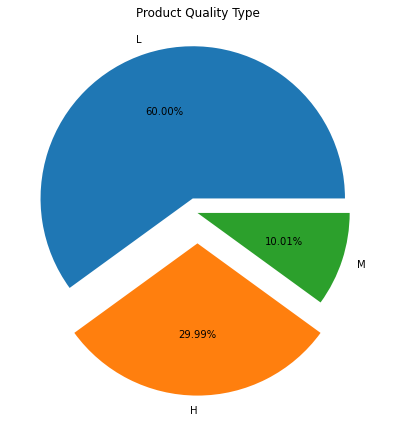

In [42]:
plt.figure(figsize=(7,7))
plt.pie(x=df['Type'].value_counts(),labels=['L','H','M'],explode=[0.1,0.2,0.0],autopct="%1.2f%%")
plt.title('Product Quality Type')
plt.show()

In [43]:
df_product_quality=df[df['Type']=='L']
df_product_quality['Target'].value_counts()

0    5753
1     231
Name: Target, dtype: int64

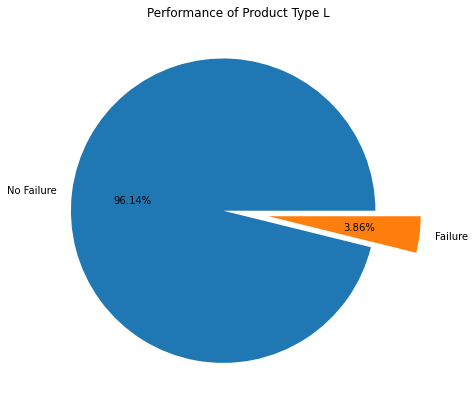

In [44]:
plt.figure(figsize=(7,7))
plt.pie(x=df_product_quality['Target'].value_counts(),labels=['No Failure','Failure'],explode=[0.1,0.2],autopct='%1.2f%%')
plt.title('Performance of Product Type L')
plt.show()

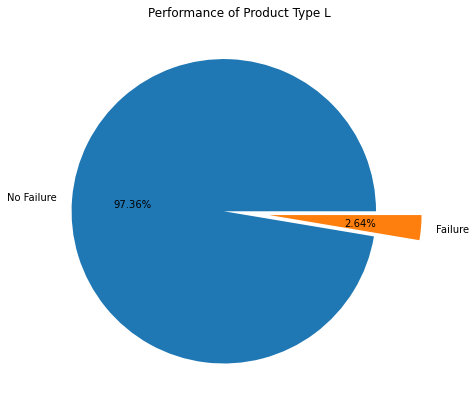

In [45]:
df_product_quality=df[df['Type']=='M']
plt.figure(figsize=(7,7))
plt.pie(x=df_product_quality['Target'].value_counts(),labels=['No Failure','Failure'],explode=[0.1,0.2],autopct='%1.2f%%')
plt.title('Performance of Product Type L')
plt.show() 

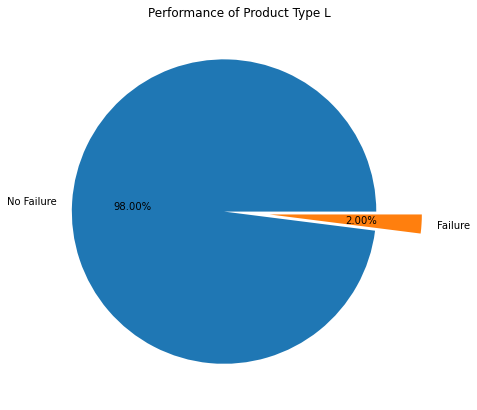

In [46]:
df_product_quality=df[df['Type']=='H']
plt.figure(figsize=(7,7))
plt.pie(x=df_product_quality['Target'].value_counts(),labels=['No Failure','Failure'],explode=[0.1,0.2],autopct='%1.2f%%')
plt.title('Performance of Product Type L')
plt.show() 

In [47]:
# from the above pie charts we can observe that product quality does not have much impact on product failure

# Examine the eddfect of Rotational speed and Torque on Failure Types

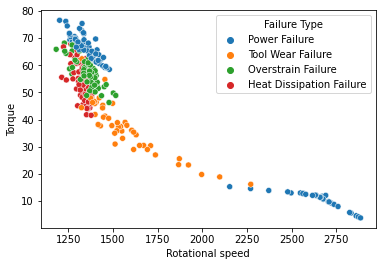

In [48]:
sns.scatterplot(x='Rotational speed',y='Torque',hue='Failure Type',data=df[df['Target']==1])

plt.show()

In [49]:
# power failure happens if the torue is extreme high & Rotational speed is extreme low and vice versa
# overstrain & Heat Dissipation Failure happens when the torue is high and low rotational speed


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9973 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Type                 9973 non-null   object 
 1   Air temperature      9973 non-null   float64
 2   Process temperature  9973 non-null   float64
 3   Rotational speed     9973 non-null   int64  
 4   Torque               9973 non-null   float64
 5   Tool wear            9973 non-null   int64  
 6   Target               9973 non-null   int64  
 7   Failure Type         9973 non-null   object 
dtypes: float64(3), int64(3), object(2)
memory usage: 959.3+ KB


In [51]:
# converting Type & Failure Type to numeric 

In [52]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
LE=LabelEncoder()
df['Type']=LE.fit_transform(df.Type)
df.head()

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Target,Failure Type
0,2,298.1,308.6,1551,42.8,0,0,No Failure
1,1,298.2,308.7,1408,46.3,3,0,No Failure
2,1,298.1,308.5,1498,49.4,5,0,No Failure
3,1,298.2,308.6,1433,39.5,7,0,No Failure
4,1,298.2,308.7,1408,40.0,9,0,No Failure


In [53]:
df=pd.get_dummies(df,columns=['Failure Type'])

In [54]:
df.head()

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Target,Failure Type_Heat Dissipation Failure,Failure Type_No Failure,Failure Type_Overstrain Failure,Failure Type_Power Failure,Failure Type_Tool Wear Failure
0,2,298.1,308.6,1551,42.8,0,0,0,1,0,0,0
1,1,298.2,308.7,1408,46.3,3,0,0,1,0,0,0
2,1,298.1,308.5,1498,49.4,5,0,0,1,0,0,0
3,1,298.2,308.6,1433,39.5,7,0,0,1,0,0,0
4,1,298.2,308.7,1408,40.0,9,0,0,1,0,0,0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9973 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Type                                   9973 non-null   int32  
 1   Air temperature                        9973 non-null   float64
 2   Process temperature                    9973 non-null   float64
 3   Rotational speed                       9973 non-null   int64  
 4   Torque                                 9973 non-null   float64
 5   Tool wear                              9973 non-null   int64  
 6   Target                                 9973 non-null   int64  
 7   Failure Type_Heat Dissipation Failure  9973 non-null   uint8  
 8   Failure Type_No Failure                9973 non-null   uint8  
 9   Failure Type_Overstrain Failure        9973 non-null   uint8  
 10  Failure Type_Power Failure             9973 non-null   uint8  
 11  Fail

In [56]:
df.columns

Index(['Type', 'Air temperature', 'Process temperature', 'Rotational speed',
       'Torque', 'Tool wear', 'Target',
       'Failure Type_Heat Dissipation Failure', 'Failure Type_No Failure',
       'Failure Type_Overstrain Failure', 'Failure Type_Power Failure',
       'Failure Type_Tool Wear Failure'],
      dtype='object')

In [57]:
x=df.iloc[:,:6]
x.head()


,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear
0,2,298.1,308.6,1551,42.8,0
1,1,298.2,308.7,1408,46.3,3
2,1,298.1,308.5,1498,49.4,5
3,1,298.2,308.6,1433,39.5,7
4,1,298.2,308.7,1408,40.0,9


In [58]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaled=StandardScaler()
x_scaled=scaled.fit_transform(x)
x_ss_scaled=pd.DataFrame(x_scaled,columns=x.columns)
x_ss_scaled.head()

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear
0,1.333519,-0.951417,-0.946356,0.067484,0.283054,-1.695647
1,-0.333046,-0.901428,-0.878954,-0.729604,0.634238,-1.648511
2,-0.333046,-0.951417,-1.013759,-0.227940,0.945286,-1.617087
3,-0.333046,-0.901428,-0.946356,-0.590253,-0.048061,-1.585664
4,-0.333046,-0.901428,-0.878954,-0.729604,0.002108,-1.554240


In [59]:
scaled=MinMaxScaler()
x_MS_scaled=scaled.fit_transform(x)
x_MS_scaled=pd.DataFrame(x_MS_scaled,columns=x.columns)
x_MS_scaled

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear
0,1.0,0.304348,0.358025,0.222934,0.535714,0.000000
1,0.5,0.315217,0.370370,0.139697,0.583791,0.011858
2,0.5,0.304348,0.345679,0.192084,0.626374,0.019763
3,0.5,0.315217,0.358025,0.154249,0.490385,0.027668
4,0.5,0.315217,0.370370,0.139697,0.497253,0.035573
...,...,...,...,...,...,...
9968,1.0,0.380435,0.333333,0.253783,0.353022,0.055336
9969,0.0,0.391304,0.333333,0.270081,0.384615,0.067194
9970,1.0,0.402174,0.358025,0.277648,0.406593,0.086957
9971,0.0,0.402174,0.370370,0.139697,0.614011,0.098814


In [60]:
y=df[['Target']]
y.head()

,Target
0,0
1,0
2,0
3,0
4,0


In [61]:
# Import the algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [62]:
dt=DecisionTreeClassifier()
RFC=RandomForestClassifier()
BC=BaggingClassifier()
SVC=SVC()
KNN=KNeighborsClassifier()

In [63]:
from sklearn.model_selection import StratifiedShuffleSplit,cross_validate

# By using Standard Scaled data

In [64]:
from sklearn.model_selection import cross_val_score
for model in [dt,RFC,BC,SVC,KNN]:
    print("="*20)
    print('Performance of',model)
    print('='*20)
    cv=StratifiedShuffleSplit(n_splits=10,test_size=0.25,random_state=25)
    scoring=["roc_auc",'f1_macro','precision_macro','recall_macro']
    cross_val_score=cross_validate(model,x_ss_scaled,y,scoring=scoring,cv=10)
    roc_auc_test_cv=round(cross_val_score['test_roc_auc'].mean(),4)
    F1_test_cv=round(cross_val_score["test_f1_macro"].mean(),4)
    precision_test_cv=round(cross_val_score['test_precision_macro'].mean(),4)
    recall_test_cv=round(cross_val_score["test_recall_macro"].mean(),4)
    
    #print of metrics
    print("ROC_AUC",roc_auc_test_cv)
    print("F1_macro",F1_test_cv)
    print("precision_macro",precision_test_cv)
    print("recall_macro",recall_test_cv)
    

Performance of DecisionTreeClassifier()
ROC_AUC 0.7826
F1_macro 0.766
precision_macro 0.7779
recall_macro 0.7826
Performance of RandomForestClassifier()
ROC_AUC 0.9519
F1_macro 0.7826
precision_macro 0.87
recall_macro 0.7437
Performance of BaggingClassifier()
ROC_AUC 0.9117
F1_macro 0.8152
precision_macro 0.8929
recall_macro 0.7775
Performance of SVC()
ROC_AUC 0.9434
F1_macro 0.6705
precision_macro 0.8907
recall_macro 0.626
Performance of KNeighborsClassifier()
ROC_AUC 0.8113
F1_macro 0.6808
precision_macro 0.81
recall_macro 0.6347


In [65]:
# using stratified sampling technique

In [66]:
from sklearn.model_selection import cross_val_score
for model in [dt,RFC,BC,SVC,KNN]:
    print("="*20)
    print('Performance of',model)
    print('='*20)
    cv=StratifiedShuffleSplit(n_splits=10,test_size=0.25,random_state=25)
    scoring=["roc_auc",'f1_macro','precision_macro','recall_macro']
    cross_val_score=cross_validate(model,x_ss_scaled,y,scoring=scoring,cv=cv)
    roc_auc_test_cv=round(cross_val_score['test_roc_auc'].mean(),4)
    F1_test_cv=round(cross_val_score["test_f1_macro"].mean(),4)
    precision_test_cv=round(cross_val_score['test_precision_macro'].mean(),4)
    recall_test_cv=round(cross_val_score["test_recall_macro"].mean(),4)
    
    #print of metrics
    print("ROC_AUC",roc_auc_test_cv)
    print("F1_macro",F1_test_cv)
    print("precision_macro",precision_test_cv)
    print("recall_macro",recall_test_cv)
    

Performance of DecisionTreeClassifier()
ROC_AUC 0.846
F1_macro 0.8512
precision_macro 0.8574
recall_macro 0.846
Performance of RandomForestClassifier()
ROC_AUC 0.9694
F1_macro 0.8452
precision_macro 0.9351
recall_macro 0.7885
Performance of BaggingClassifier()
ROC_AUC 0.9433
F1_macro 0.8759
precision_macro 0.9378
recall_macro 0.831
Performance of SVC()
ROC_AUC 0.9563
F1_macro 0.6828
precision_macro 0.9223
recall_macro 0.6211
Performance of KNeighborsClassifier()
ROC_AUC 0.8546
F1_macro 0.7114
precision_macro 0.8836
recall_macro 0.6498


# Using MiN Max scaled data

In [67]:
from sklearn.model_selection import cross_val_score
for model in [dt,RFC,BC,SVC,KNN]:
    print("="*20)
    print('Performance of',model)
    print('='*20)
    cv=StratifiedShuffleSplit(n_splits=10,test_size=0.25,random_state=25)
    scoring=["roc_auc",'f1_macro','precision_macro','recall_macro']
    cross_val_score=cross_validate(model,x_MS_scaled,y,scoring=scoring,cv=10)
    roc_auc_test_cv=round(cross_val_score['test_roc_auc'].mean(),4)
    F1_test_cv=round(cross_val_score["test_f1_macro"].mean(),4)
    precision_test_cv=round(cross_val_score['test_precision_macro'].mean(),4)
    recall_test_cv=round(cross_val_score["test_recall_macro"].mean(),4)
    
    #print of metrics
    print("ROC_AUC",roc_auc_test_cv)
    print("F1_macro",F1_test_cv)
    print("precision_macro",precision_test_cv)
    print("recall_macro",recall_test_cv)

Performance of DecisionTreeClassifier()
ROC_AUC 0.7903
F1_macro 0.7649
precision_macro 0.7703
recall_macro 0.7903
Performance of RandomForestClassifier()
ROC_AUC 0.9554
F1_macro 0.7919
precision_macro 0.8833
recall_macro 0.7513
Performance of BaggingClassifier()
ROC_AUC 0.9122
F1_macro 0.8093
precision_macro 0.8702
recall_macro 0.7851
Performance of SVC()
ROC_AUC 0.9544
F1_macro 0.61
precision_macro 0.8976
recall_macro 0.5716
Performance of KNeighborsClassifier()
ROC_AUC 0.7819
F1_macro 0.6368
precision_macro 0.8131
recall_macro 0.5969


In [68]:
# using stratified sampling technique

In [69]:
from sklearn.model_selection import cross_val_score
for model in [dt,RFC,BC,SVC,KNN]:
    print("="*20)
    print('Performance of',model)
    print('='*20)
    cv=StratifiedShuffleSplit(n_splits=10,test_size=0.25,random_state=25)
    scoring=["roc_auc",'f1_macro','precision_macro','recall_macro']
    cross_val_score=cross_validate(model,x_MS_scaled,y,scoring=scoring,cv=cv)
    roc_auc_test_cv=round(cross_val_score['test_roc_auc'].mean(),4)
    F1_test_cv=round(cross_val_score["test_f1_macro"].mean(),4)
    precision_test_cv=round(cross_val_score['test_precision_macro'].mean(),4)
    recall_test_cv=round(cross_val_score["test_recall_macro"].mean(),4)
    
    #print of metrics
    print("ROC_AUC",roc_auc_test_cv)
    print("F1_macro",F1_test_cv)
    print("precision_macro",precision_test_cv)
    print("recall_macro",recall_test_cv)
    

Performance of DecisionTreeClassifier()
ROC_AUC 0.8496
F1_macro 0.8541
precision_macro 0.8602
recall_macro 0.8496
Performance of RandomForestClassifier()
ROC_AUC 0.971
F1_macro 0.8401
precision_macro 0.9349
recall_macro 0.7818
Performance of BaggingClassifier()
ROC_AUC 0.9426
F1_macro 0.8687
precision_macro 0.9354
recall_macro 0.8214
Performance of SVC()
ROC_AUC 0.9589
F1_macro 0.6214
precision_macro 0.9401
recall_macro 0.5751
Performance of KNeighborsClassifier()
ROC_AUC 0.8341
F1_macro 0.6825
precision_macro 0.8776
recall_macro 0.6247


In [ ]:
# Random forest and Bagging Classifier are performing better compared to other models
# There is no much difference in the results for min max scaled data and Standard scaled data

# using Train_test_split method

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,precision_recall_fscore_support
x_train_ss,x_test_ss,y_train_ss,y_test_ss=train_test_split(x_ss_scaled,y,train_size=0.80,random_state=100)


In [129]:
for model in [dt,RFC,BC,SVC,KNN]:
    print("="*80)
    print('Performance of',model)
    print("="*80)
    abc=model.fit(x_train_ss,y_train_ss)
    y_pred_ss=abc.predict(x_test_ss)
    cm=confusion_matrix(y_test_ss,y_pred_ss)
    Accuracy=accuracy_score(y_test_ss,y_pred_ss)
    CR=classification_report(y_test_ss,y_pred_ss)
    ROC=roc_auc_score(y_test_ss,y_pred_ss)
    PRFS=precision_recall_fscore_support(y_test_ss,y_pred_ss,average='macro')
   
    print()
    print('Confusion Matrics',cm)
    print()
    print('Accuracy',Accuracy)
    print()
    print('Classification Report',CR)
    print()
    print('ROC_AUC',ROC)
    print()
    print("Macro Precision_recall_F1",PRFS)
    print()

Performance of DecisionTreeClassifier()

Confusion Matrics [[1915   22]
 [  17   41]]

Accuracy 0.9804511278195489

Classification Report               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1937
           1       0.65      0.71      0.68        58

    accuracy                           0.98      1995
   macro avg       0.82      0.85      0.83      1995
weighted avg       0.98      0.98      0.98      1995


ROC_AUC 0.8477693909885532

Macro Precision_recall_F1 (0.8209972394755003, 0.8477693909885532, 0.8338029131750789, None)

Performance of RandomForestClassifier()

Confusion Matrics [[1933    4]
 [  21   37]]

Accuracy 0.9874686716791979

Classification Report               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1937
           1       0.90      0.64      0.75        58

    accuracy                           0.99      1995
   macro avg       0.95      0.82      0.87      1995
we

# Using Min max scaled data

In [78]:
x_train_MS,x_test_MS,y_train_MS,y_test_MS=train_test_split(x_MS_scaled,y,train_size=0.80,random_state=100)


In [130]:
for model in [dt,RFC,BC,SVC,KNN]:
    print("="*80)
    print("Performance of",model)
    print("="*80)
    print()
    abc=model.fit(x_train_MS,y_train_MS)
    y_pred_MS=abc.predict(x_test_MS)
    cm=confusion_matrix(y_test_MS,y_pred_MS)
    Accuracy=accuracy_score(y_test_MS,y_pred_MS)
    CR=classification_report(y_test_MS,y_pred_MS)
    ROC=roc_auc_score(y_test_MS,y_pred_MS)
    PRFS=precision_recall_fscore_support(y_test_MS,y_pred_MS,average='macro')
    
    print()
    print('Confusion Matrics', cm)
    print()
    print('Accuracy', Accuracy)
    print()
    print('Classification Report', CR)
    print()
    print('ROC_AUC', ROC)
    print()
    print("Macro Precision_recall_F1",PRFS)
    print()

Performance of DecisionTreeClassifier()


Confusion Matrics [[1916   21]
 [  17   41]]

Accuracy 0.9809523809523809

Classification Report               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1937
           1       0.66      0.71      0.68        58

    accuracy                           0.98      1995
   macro avg       0.83      0.85      0.84      1995
weighted avg       0.98      0.98      0.98      1995


ROC_AUC 0.8480275221191675

Macro Precision_recall_F1 (0.8262478514093086, 0.8480275221191675, 0.8367571059431524, None)

Performance of RandomForestClassifier()


Confusion Matrics [[1933    4]
 [  22   36]]

Accuracy 0.9869674185463659

Classification Report               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1937
           1       0.90      0.62      0.73        58

    accuracy                           0.99      1995
   macro avg       0.94      0.81      0.86      1995


In [ ]:
# results are better in standard scaled data compared to min max data

# Balancing the data

In [80]:
from imblearn.over_sampling import SMOTE,ADASYN,RandomOverSampler,BorderlineSMOTE
SM=SMOTE()
ADS=ADASYN()
ROS=RandomOverSampler()
border=BorderlineSMOTE()

In [133]:
for model in [RFC,BC]:
    print("="*50)
    print("After Balancing Performance of",model)
    print("="*50)
    for balancer in [SM,border]:
        x_train_ss_1,y_train_ss_1=balancer.fit_resample(x_train_ss,y_train_ss)
        abc=model.fit(x_train_ss_1,y_train_ss_1)
        y_pred_SS=abc.predict(x_test_ss)
        cm=confusion_matrix(y_test_ss,y_pred_SS)
        Accuracy=accuracy_score(y_test_ss,y_pred_SS)
        CR=classification_report(y_test_ss,y_pred_SS)
        ROC=roc_auc_score(y_test_ss,y_pred_SS)
        PRFS=precision_recall_fscore_support(y_test_ss,y_pred_SS,average='macro')    
        
        print(model,"using technique",balancer)
        print("="*50)
        print('Confusion Matrics', cm)
        print("="*50)
        print("="*50)
        print('Accuracy', Accuracy)
        print("="*50)
        print('Classification Report', CR)
        print("="*50)
        print('ROC_AUC', ROC)
        print("="*50)
        print("Macro Precision_recall_F1",PRFS)
        print("="*50)
        print()

After Balancing Performance of RandomForestClassifier()
RandomForestClassifier() using technique SMOTE()
Confusion Matrics [[1897   40]
 [  12   46]]
Accuracy 0.9739348370927319
Classification Report               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1937
           1       0.53      0.79      0.64        58

    accuracy                           0.97      1995
   macro avg       0.76      0.89      0.81      1995
weighted avg       0.98      0.97      0.98      1995

ROC_AUC 0.8862264789133569
Macro Precision_recall_F1 (0.7642988536552682, 0.8862264789133569, 0.812684174033628, None)

RandomForestClassifier() using technique BorderlineSMOTE()
Confusion Matrics [[1913   24]
 [  16   42]]
Accuracy 0.9799498746867168
Classification Report               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1937
           1       0.64      0.72      0.68        58

    accuracy                       

In [83]:
for model in [RFC,BC]:
    print("="*50)
    print("After Balancing Performance of",model)
    print("="*50)
    for balancer in [SM,border]:
        x_train_ms_1,y_train_ms_1=balancer.fit_resample(x_train_MS,y_train_MS)
        abc=model.fit(x_train_ms_1,y_train_ms_1)
        y_pred_MS=abc.predict(x_test_MS)
        cm=confusion_matrix(y_test_MS,y_pred_MS)
        Accuracy=accuracy_score(y_test_MS,y_pred_MS)
        CR=classification_report(y_test_MS,y_pred_MS)
        ROC=roc_auc_score(y_test_MS,y_pred_MS)
        PRFS=precision_recall_fscore_support(y_test_MS,y_pred_MS,average='macro')    
        
        print(model,"using technique",balancer)
        print("="*50)
        print('Confusion Matrics', cm)
        print("="*50)
        print("="*50)
        print('Accuracy', Accuracy)
        print("="*50)
        print('Classification Report', CR)
        print("="*50)
        print('ROC_AUC', ROC)
        print("="*50)
        print("Macro Precision_recall_F1",PRFS)
        print("="*50)
        print()

After Balancing Performance of RandomForestClassifier()
RandomForestClassifier() using technique SMOTE()
Confusion Matrics [[1892   45]
 [  11   47]]
Accuracy 0.9719298245614035
Classification Report               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1937
           1       0.51      0.81      0.63        58

    accuracy                           0.97      1995
   macro avg       0.75      0.89      0.81      1995
weighted avg       0.98      0.97      0.97      1995

ROC_AUC 0.8935565129154575
Macro Precision_recall_F1 (0.752544609198291, 0.8935565129154576, 0.8060416666666667, None)

RandomForestClassifier() using technique BorderlineSMOTE()
Confusion Matrics [[1911   26]
 [  16   42]]
Accuracy 0.9789473684210527
Classification Report               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1937
           1       0.62      0.72      0.67        58

    accuracy                       

# Optimization (Balanced Data)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [85]:
rfc=RandomForestClassifier(random_state=42,criterion="entropy")
bc=BaggingClassifier(random_state=42,n_jobs=-1)

In [86]:
param= {'n_estimators': np.arange(10, 160,10),
        'max_depth': np.arange(10, 110, 10),
        'min_samples_split': [2, 5, 10]}

In [87]:
random_rfc=RandomizedSearchCV(rfc,param,cv=10,n_iter=10,n_jobs=-1)

In [ ]:
# standard scaled data

In [88]:
random_rfc.fit(x_train_ss_1,y_train_ss_1)

RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(criterion='entropy',
                                                    random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]),
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150])})

In [90]:
print(random_rfc.best_params_)
print(random_rfc.best_score_)

{'n_estimators': 30, 'min_samples_split': 2, 'max_depth': 100}
0.9912417694979677


In [95]:
# bagging classifier
bc_param={'n_estimators': np.arange(10, 160,10)}


In [96]:
random_bc=RandomizedSearchCV(bc,bc_param,cv=10,n_iter=10,n_jobs=-1)

In [97]:
random_bc.fit(x_train_ss_1,y_train_ss_1)


RandomizedSearchCV(cv=10,
                   estimator=BaggingClassifier(n_jobs=-1, random_state=42),
                   n_jobs=-1,
                   param_distributions={'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150])})

In [98]:
print(random_bc.best_params_)
print(random_bc.best_score_)

{'n_estimators': 50}
0.9901390526642713


In [ ]:
# for min max scaled data

In [ ]:
# Random Classifier

In [101]:
ms_param={'n_estimators': np.arange(10, 160,10),
        'max_depth': np.arange(10, 110, 10),
        'min_samples_split': [2, 5, 10]}

In [104]:
random_rfc_MS=RandomizedSearchCV(rfc,ms_param,cv=10,n_iter=10,n_jobs=-1)

In [105]:
random_rfc_MS.fit(x_train_ms_1,y_train_ms_1)

RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(criterion='entropy',
                                                    random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]),
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150])})

In [111]:
random_rfc_MS.best_params_


{'n_estimators': 130, 'min_samples_split': 2, 'max_depth': 100}

In [112]:
random_rfc_MS.best_score_

0.989619320080363

In [113]:
#bagging classifier

In [114]:
bc_param_MS={'n_estimators': np.arange(10, 160,10)}

In [120]:
random_bc_MS=RandomizedSearchCV(bc,bc_param_MS,cv=10,n_iter=10,n_jobs=-1)

In [121]:
random_bc_MS.fit(x_train_ms_1,y_train_ms_1)

RandomizedSearchCV(cv=10,
                   estimator=BaggingClassifier(n_jobs=-1, random_state=42),
                   n_jobs=-1,
                   param_distributions={'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150])})

In [123]:
print(random_bc_MS.best_params_)
print(random_bc_MS.best_score_)

{'n_estimators': 140}
0.9878027389696754


In [ ]:
# Conclusion:
* standard scaled data is giving more accracy compared to Min Max


# Optimization (unbalanced data)

In [134]:
rfc_un=RandomForestClassifier(random_state=42,criterion="entropy")
bc_un=BaggingClassifier(random_state=42,n_jobs=-1)

In [135]:
param= {'n_estimators': np.arange(10, 160,10),
        'max_depth': np.arange(10, 110, 10),
        'min_samples_split': [2, 5, 10]}

In [136]:
random_rfc_un=RandomizedSearchCV(rfc,param,cv=10,n_iter=10,n_jobs=-1)

In [ ]:
# standard scaled data

In [137]:
random_rfc_un.fit(x_train_ss,y_train_ss)

RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(criterion='entropy',
                                                    random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]),
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150])})

In [138]:
print(random_rfc_un.best_params_)
print(random_rfc_un.best_score_)

{'n_estimators': 80, 'min_samples_split': 5, 'max_depth': 50}
0.9849584752345104


In [95]:
# bagging classifier
bc_param_un={'n_estimators': np.arange(10, 160,10)}


In [140]:
random_bc_un=RandomizedSearchCV(bc,bc_param,cv=10,n_iter=10,n_jobs=-1)

In [141]:
random_bc_un.fit(x_train_ss,y_train_ss)


RandomizedSearchCV(cv=10,
                   estimator=BaggingClassifier(n_jobs=-1, random_state=42),
                   n_jobs=-1,
                   param_distributions={'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150])})

In [143]:
print(random_bc_un.best_params_)
print(random_bc_un.best_score_)

{'n_estimators': 130}
0.9862119225290329


In [ ]:
# for min max scaled data

In [ ]:
# Random Classifier

In [101]:
ms_param={'n_estimators': np.arange(10, 160,10),
        'max_depth': np.arange(10, 110, 10),
        'min_samples_split': [2, 5, 10]}

In [144]:
random_rfc_MS_un=RandomizedSearchCV(rfc,ms_param,cv=10,n_iter=10,n_jobs=-1)

In [146]:
random_rfc_MS_un.fit(x_train_MS,y_train_MS)

RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(criterion='entropy',
                                                    random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]),
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150])})

In [111]:
random_rfc_MS_un.best_params_


{'n_estimators': 130, 'min_samples_split': 2, 'max_depth': 100}

In [148]:
random_rfc_MS_un.best_score_

0.9847076914368731

In [113]:
#bagging classifier

In [149]:
bc_param_MS_un={'n_estimators': np.arange(10, 160,10)}

In [150]:
random_bc_MS_un=RandomizedSearchCV(bc,bc_param_MS,cv=10,n_iter=10,n_jobs=-1)

In [152]:
random_bc_MS_un.fit(x_train_MS,y_train_MS)

RandomizedSearchCV(cv=10,
                   estimator=BaggingClassifier(n_jobs=-1, random_state=42),
                   n_jobs=-1,
                   param_distributions={'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150])})

In [123]:
print(random_bc_MS_un.best_params_)
print(random_bc_MS_un.best_score_)

{'n_estimators': 140}
0.9878027389696754


In [ ]:
# Conclusion:
* Balanced data is giving more accuracy compared to unbalance one
* standard scaled data is giving more accracy compared to Min Max scaled 



In [158]:
RDFO=RandomForestClassifier(random_state=42,criterion="entropy",n_estimators=30, min_samples_split=2, max_depth= 100)
BBC=BaggingClassifier(random_state=42,n_jobs=-1,n_estimators=50)

In [162]:
RDFO.fit(x_train_ss_1,y_train_ss_1)
y_pred=RDFO.predict(x_test_ss)
print(classification_report(y_pred,y_test_ss))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1932
           1       0.71      0.65      0.68        63

    accuracy                           0.98      1995
   macro avg       0.85      0.82      0.83      1995
weighted avg       0.98      0.98      0.98      1995



In [163]:
BBC.fit(x_train_ss_1,y_train_ss_1)
y_pred=BBC.predict(x_test_ss)
print(classification_report(y_pred,y_test_ss))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1925
           1       0.71      0.59      0.64        70

    accuracy                           0.98      1995
   macro avg       0.85      0.79      0.81      1995
weighted avg       0.98      0.98      0.98      1995



In [164]:
# working on multiclass failure type

In [184]:
data["Failure Type"].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

In [188]:
df['Failure Type']=data['Failure Type'].map({'No Failure':0, 'Power Failure':1, 'Tool Wear Failure':2,
       'Overstrain Failure':3, 'Random Failures':4,
       'Heat Dissipation Failure':5})

In [195]:
df['Failure Type'].value_counts()

0    9643
5     112
1      95
3      78
2      45
Name: Failure Type, dtype: int64

In [206]:
Y_ftype=df["Failure Type"]

In [207]:
X_train1,X_test1,Y_train1,Y_test1=train_test_split(x_scaled,Y_ftype,train_size=0.80,stratify=Y_ftype,random_state=111)

In [208]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
for model in[dt,RFC,BC,SVC,KNN]:
    print("======="*6)
    print("Performance of",model)
    print("======="*6)
    abc=model.fit(X_train1,Y_train1)
    y_pred1=abc.predict(X_test1)
    cm=confusion_matrix(Y_test1,y_pred1)
    AS=accuracy_score(Y_test1,y_pred1)
    CR=classification_report(Y_test1,y_pred1)
    PRFS=precision_recall_fscore_support(Y_test1,y_pred1, average='macro')
        
    # print of metrics
    print("confusion matrix \n",cm) 
    print("======="*3)
    print("Accuracy \n",AS) 
    print("======="*3)
    print("Classification Report \n",CR)  
    print("======="*3)
    print("MACRO Precision_recall_F1 \n",PRFS) 
     

Performance of DecisionTreeClassifier()
confusion matrix 
 [[1912    4    8    3    2]
 [   1   18    0    0    0]
 [   8    0    0    1    0]
 [   6    0    1    9    0]
 [   2    0    0    0   20]]
Accuracy 
 0.9819548872180451
Classification Report 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1929
           1       0.82      0.95      0.88        19
           2       0.00      0.00      0.00         9
           3       0.69      0.56      0.62        16
           5       0.91      0.91      0.91        22

    accuracy                           0.98      1995
   macro avg       0.68      0.68      0.68      1995
weighted avg       0.98      0.98      0.98      1995

MACRO Precision_recall_F1 
 (0.6821535126356277, 0.6820292947482519, 0.6798032976697693, None)
Performance of RandomForestClassifier()
confusion matrix 
 [[1925    1    0    2    1]
 [   2   16    0    1    0]
 [   8    0    0    1    0]
 [   9    0    0   

In [ ]:
#after balalncing performance

In [205]:
for model in[dt,RFC,BC,SVC,KNN]:
    print("======="*8)
    print("AFTER data-Balancing Performance:-",model)
    print("======="*8)
    for balancer in[SM,border]:
        X_train_2, Y_train_2 = balancer.fit_resample(X_train1, Y_train1)
        abc=model.fit(X_train_2,Y_train_2)
        y_pred=abc.predict(X_test1)
        cm=confusion_matrix(Y_test1,y_pred)
        AS=accuracy_score(Y_test1,y_pred)
        CR=classification_report(Y_test1,y_pred)
        #ROC=roc_auc_score(Y_test,y_pred)
        PRFS=precision_recall_fscore_support(Y_test1,y_pred, average='macro')
        
        print(model,"using technique:- ",balancer)
        #print("======="*6) 
        print("======="*8) 
        # print of metrics
        print("confusion matrix \n",cm) 
        print("======="*3)
        print("Accuracy \n",AS) 
        print("======="*3)
        print("Classification Report \n",CR) 
        print("======="*3)
        #print("ROC_AUC \n",ROC) 
        #print("======="*3)
        print("MACRO Precision_recall_F1 \n",PRFS)
        print("======="*8)
        print("Conclude one balaning method")
        print("======="*8)
        
        print("======="*8)

AFTER data-Balancing Performance:- DecisionTreeClassifier()
DecisionTreeClassifier() using technique:-  SMOTE()
confusion matrix 
 [[1884    8   20    9    8]
 [   4   15    0    0    0]
 [   5    1    3    0    0]
 [   6    0    0   10    0]
 [   3    0    0    0   19]]
Accuracy 
 0.9679197994987468
Classification Report 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      1929
           1       0.62      0.79      0.70        19
           2       0.13      0.33      0.19         9
           3       0.53      0.62      0.57        16
           5       0.70      0.86      0.78        22

    accuracy                           0.97      1995
   macro avg       0.60      0.72      0.64      1995
weighted avg       0.98      0.97      0.97      1995

MACRO Precision_recall_F1 
 (0.5951981106777214, 0.7176230463760136, 0.6431336803264949, None)
Conclude one balaning method
DecisionTreeClassifier() using technique:-  BorderlineSMOTE()

SVC() using technique:-  BorderlineSMOTE()
confusion matrix 
 [[1813   11   54   10   41]
 [   0   18    0    0    1]
 [   6    0    3    0    0]
 [   1    0    0   15    0]
 [   0    0    0    1   21]]
Accuracy 
 0.9373433583959899
Classification Report 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97      1929
           1       0.62      0.95      0.75        19
           2       0.05      0.33      0.09         9
           3       0.58      0.94      0.71        16
           5       0.33      0.95      0.49        22

    accuracy                           0.94      1995
   macro avg       0.52      0.82      0.60      1995
weighted avg       0.98      0.94      0.95      1995

MACRO Precision_recall_F1 
 (0.5159462981060077, 0.8225224848137593, 0.6033007406507791, None)
Conclude one balaning method
AFTER data-Balancing Performance:- KNeighborsClassifier()
KNeighborsClassifier() using technique:-  SMOTE()
confusion matrix 
 [[1

In [ ]:
# Conclusion
# for failure type, unbalanced data works good compared to Unbalanced data and Random Forest,Bagging and Decision tree are working good
# for target column, balanced data works good and Bagging Classifier, Decision tree and Random Forest are working good
